In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller



In [17]:
df= pd.read_csv('train.csv', encoding='latin1')
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)
print(list(df.columns))
#CSV INFO
# Rows - 3000888
# Columns - 6
# Columns - id , date, store_nbr, family, sales , onpromotion
# Price = UnitPrice * Quantity


   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+

In [18]:
df = pd.read_csv(
    'train.csv',
    encoding='latin1',
    parse_dates=['date']
)
print(df.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object


In [19]:
monthly_df = (
    df
    .set_index('date')
    .resample('MS')['sales']
    .sum()
    .reset_index()
    .rename(columns={'date': 'ds', 'sales': 'y'})
)

print(monthly_df.head())
print(len(monthly_df))


          ds             y
0 2013-01-01  1.032762e+07
1 2013-02-01  9.658960e+06
2 2013-03-01  1.142850e+07
3 2013-04-01  1.099346e+07
4 2013-05-01  1.159770e+07
56


In [20]:
parse_dates=['date']
df.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

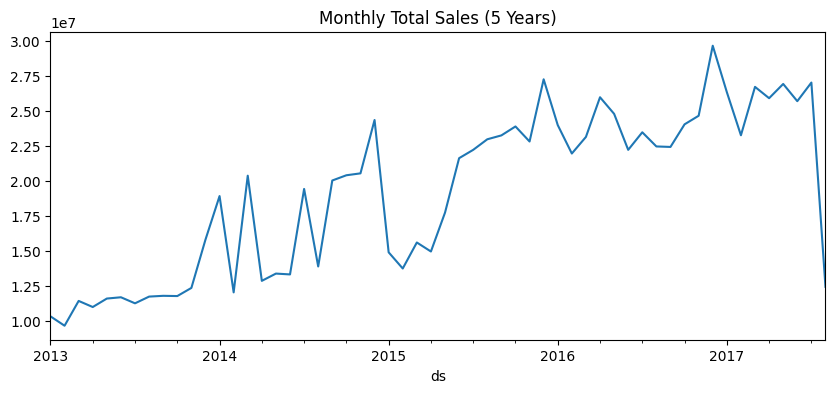

In [21]:
monthly_df.set_index('ds')['y'].plot(
    figsize=(10,4),
    title="Monthly Total Sales (5 Years)"
)
plt.show()

In [22]:
monthly_df['ds'].max()
monthly_df = monthly_df[monthly_df['ds'] <= '2017-05-01']



<Axes: title={'center': 'Monthly Sales (Trimmed to Complete Months)'}, xlabel='ds'>

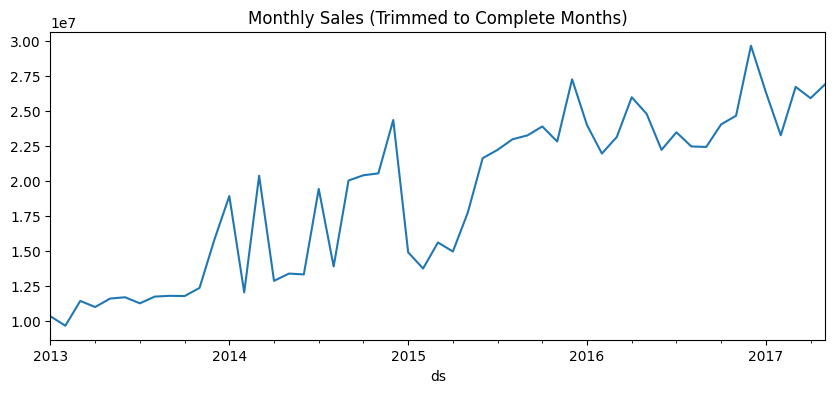

In [23]:
monthly_df.set_index('ds')['y'].plot(
    figsize=(10,4),
    title="Monthly Sales (Trimmed to Complete Months)"
)


In [24]:
from pmdarima import auto_arima

sarima_model = auto_arima(
    monthly_df['y'],
    seasonal=True,
    m=12,
    d=1,
    D=1,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1328.718, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1342.068, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1331.663, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1327.056, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1334.962, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1328.747, Time=0.07 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1328.406, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1332.929, Time=0.03 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1329.324, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1327.231, Time=0.05 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1327.744, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1325.341, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1334.148, Time=0.01 sec
 ARIMA(1,1,0)(1,1,1)[12]

In [25]:
n_periods = 12 # or 12

forecast = sarima_model.predict(n_periods=n_periods)

forecast_df = pd.DataFrame({
    'ds': pd.date_range(
        start=monthly_df['ds'].max() + pd.offsets.MonthBegin(1),
        periods=n_periods,
        freq='MS'
    ),
    'value': forecast,
    'type': 'Forecast'
})
print(forecast_df)

           ds         value      type
53 2017-06-01  2.670934e+07  Forecast
54 2017-07-01  2.836308e+07  Forecast
55 2017-08-01  2.727685e+07  Forecast
56 2017-09-01  2.839050e+07  Forecast
57 2017-10-01  2.917500e+07  Forecast
58 2017-11-01  2.921088e+07  Forecast
59 2017-12-01  3.317899e+07  Forecast
60 2018-01-01  3.101812e+07  Forecast
61 2018-02-01  2.848726e+07  Forecast
62 2018-03-01  3.131753e+07  Forecast
63 2018-04-01  3.071868e+07  Forecast
64 2018-05-01  3.134095e+07  Forecast


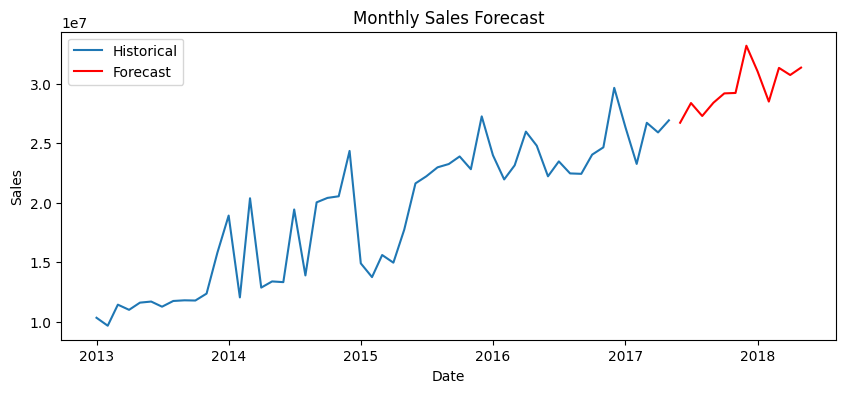

In [26]:
#Forecast Visualization
plt.figure(figsize=(10,4))
plt.plot(monthly_df['ds'], monthly_df['y'], label='Historical')
plt.plot(forecast_df['ds'], forecast_df['value'], label='Forecast', color='red')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [27]:
#SARIMA Model Summary
print(sarima_model.summary())



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   53
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -659.671
Date:                              Fri, 02 Jan 2026   AIC                           1325.341
Time:                                      01:07:42   BIC                           1330.408
Sample:                                           0   HQIC                          1327.173
                                               - 53                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3880      0.186     -2.089      0.037      -0.752      -0.024
ma.S.L12      -0.66

Observation from the summary:
 The model includes both non-seasonal and seasonal components, indicating that the data exhibits both short
 and long-term patterns.-term dependencies.
 The coefficients provide insights into the influence of past values and seasonal patterns on current sales
 The AIC and BIC values can be used to compare this model with other potential models; lower values indicate a better fit.
 The forecasted values for the next 12 months provide an estimate of future sales based on historical trends and seasonal patterns.
 It can be compared with other the actual test data for accuracy.

In [ ]:
#Saving forecasted values in csv file
forecast_df.to_csv('sarima_forecast.csv', index=False)
#Saving actual values in csv file
actuals_train = monthly_df[['ds', 'y']].copy()
actuals_train.to_csv('actuals_train.csv', index=False)
#What does actual train,csv contain?
# It contains the actual historical sales data used for training the SARIMA model, with two columns: 'ds' for the date and 'y' for the sales values. 
#Why does actual train has so less rows?
# The actual_train.csv has fewer rows because it only includes the monthly aggregated sales data used for training the SARIMA model, rather than the full daily sales data from the original dataset. It still doesnt have 56 rows because the training data was trimmed to complete months only, ending at '2017-05-01', which results in a total of 56 months of data.
